![title](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdyclassroom.files.wordpress.com%2F2019%2F09%2Fmongodb.jpg&f=1&nofb=1)

<div style="background-color: #168b33; padding: 5px;"></div>

# Unstrukturierte Daten aus einer MongoDB auslesen und auswerten


1. [Übersicht](#Uebersicht)
    1. [Einführung in die dokumentenorientierte MongoDB](#Einführung)
    2. [Ziel dieses Notebooks](#Ziel)
2. [MongoDB Grundlagen](#Grundlagen)
    1. [JSON und BSON](#BSON)
    2. [Starten der MongoDB und Verbdindung herstellen](#Start)
    3. [Lesen, speichern, updaten und löschen von Daten](#CRUD)
    4. [Aufgabenbereich 1](#Aufgabenbereich1)
3. [Betrachten des Datenbestandes](#Datenbestand)
    1. [Importieren eines JSON Datensatzes](#JSON-Einlesen)
    2. [Daten mit Pandas anzeigen](#Pandas)
    3. [Die Dokumente für Pandas vorbereiten](#Vorbereiten)
    4. [Aufgabenbereich 2](#Aufgabenbereich2)
4. [Auslesen und Zusammenhänge herausfinden mit der Aggregation Pipeline](#Pipeline)
    1. [Aufgabenbereich 3](#Aufgabenbereich3)
5. [Auslesen und Zusammenhänge herausfinden mit dem Map-Reduce Verfahren](#Map)
    1. [Aufgabenbereich 4](#Aufgabenbereich4)

<div style="background-color: #168b33; padding: 5px;"></div>

## 1. <b id="Uebersicht">Übersicht</b>

### 1.1 <b id="Einführung">Einführung in die dokumentenorientierte MongoDB</b>
Große Datenmengen werden heutzutage schnell generiert. Die MongoDB ist eine dokumentenorientierte Datenbank, die oft dazu verwendet wird um strukturlose Daten in einem verteilten Cluster aus Datenbanken abzuspeichern. Einige Eigenschaften der MongoDB stechen besonders hervor, wenn es um die Wahl des geeigneten Database Management Systems
geht. Hierzu zählen eine richtige Abfragesprache für dynamische Abfragen, eine hohe Verfügbarkeit, Skalierbarkeit, eine effiziente Speicher Engine, Datenkonsistenz und Datenintegrität.

MongoDB eignet sich am besten für große Datenmengen, wenn die vorhandenen Daten weitere Manipulationen für die gewünschte Ausgabe benötigen. Zu den leistungsstarken Funktion zählen hierbei die CRUD-Operationen, das Aggregations-Framework, die Textsuche und die Map-Reduce-Funktion.

### 1.2 Ziel dieses Notebooks
Es soll verdeutlicht werden wie aus einer NoSQL Datenbank Daten effizient ausgelesen werden können, um diese zu bearbeiten. Datensätze liegen nicht immer als CSV Datei vor oder liegen in einem verteilten System aus Datenbanken. Diese Daten direkt aus der Datenbank auszulesen und mit effektiven Werkzeugen wie dem Aggregations-Framework zu strukturieren ist das Ziel dieses Notebooks.

## 2. <b id="Grundlagen">Grundlagen</b>

Hierbei sollen die Grundlagen für die Interaktion mit der dokumentenorientierten Datenbank MongoDB und die Verwendung der JavaScript Object Notation (JSON) erklärt werden. Diese ist wichtig, denn die MongoDB speichert Daten nicht in Tabellen, sondern in Collections, welche keine festen Strukturen enthalten. Die Collections können als äquivalent zu den Tabellen in SQL Datenbanken angesehen werden. Die Dokumente selbst liegen innerhalb dieser Collections und werden in einer erweiterten JSON Struktur dargestellt, welche aber mehr Datentypen bietet.

### 2.1 <b id="BSON">JSON und BSON</b>
Der Aufbau der Datensätze wird hier genauer betrachtet. Die Struktur eines einzelnen Dokumentes ist die gleiche wie die von JSON Dateien. In der unteren Abbildung ist ein Dokument zu sehen welches in einer MongoDB gespeichert wurde. Die Daten werden als Key/Value Paare dargestellt, wobei beim ersen Paar mit dem Key "_id" zu erkennen ist, dass der Value einen neuen Datentyp enthällt.

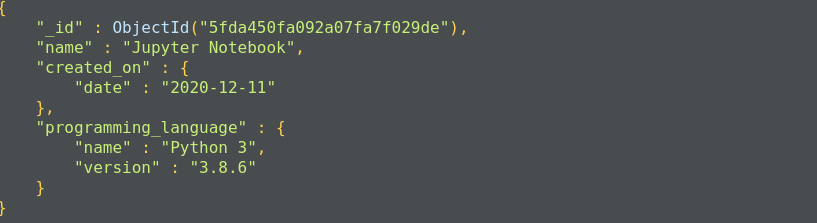

Die neuen Datentypen werden als BSON Datentypen bezeichnet. BSON steht hierbei für Binary JSON. Die MongoDB speichert die Datentypen in einer binären Form ab, wodurch es möglich ist die JSON Datentypen zu ergänzen. Der Key "_id" enthällt somit den BSON Datentyp ObjectId(). Dieses Feld repräsentiert die einzigartige ID jedes Dokumentes. Diese wird benötigt um ein Dokument zu identifizieren (vergleichbar mit Primärschlüssel).

<table style="font-size:14px">
	<tbody>
        <tr>
			<td style="width: 200px;text-align: center;" align="center"><b>BSON Datentypen</b></td>
			<td style="width: 200px;text-align: center;" align="center"><b>JSON Datentypen</b></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Double</td>
			<td style="width: 200px;text-align: center;" align="center">Number</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">String</td>
			<td style="width: 200px;text-align: center;" align="center">String</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Object</td>
			<td style="width: 200px;text-align: center;" align="center">Object</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Array</td>
			<td style="width: 200px;text-align: center;" align="center">Array</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Boolean</td>
			<td style="width: 200px;text-align: center;" align="center">Boolean</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Null</td>
			<td style="width: 200px;text-align: center;" align="center">Null/Empty</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Binary data</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Undefined</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">ObjectId</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Date</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Regular Expression</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">JavaScript</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Symbol</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">32-bit integer</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">64-bit integer</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
	</tbody>
</table>



Im weiteren Schritt wird gezeigt wie die MongoDB gestartet wird und erste Datensätze importiert werden kann. 

Anhand dieser Daten sollen die Grundladen zu den CRUD Operationen verdeutlicht werden. CRUD steht hierbei für die vier Interaktionsmöglichkeiten wenn es darum geht Dokumente zu erstellen (create), lesen (read), aktualisieren (update) und zu löschen (delete).

### 2.2 <b id="Start">Starten der MongoDB und Verbdindung herstellen</b>

In [1]:
#!mongod --config /home/jovyan/mongod.conf

<b>MongoDB Treiber importieren</b>

In [2]:
import pymongo
import json 
from bson.son import SON
from bson.objectid import ObjectId
from pprint import pprint

<b>Verbindung zu MongoDB herstellen und alle vorhandenen Datenbanken ausgeben</b>

In [3]:
client = pymongo.MongoClient()
client.list_database_names()

['Hotels', 'admin', 'config', 'local']

<b>Eine neue Datenbank und eine Collection anlegen<b>

In [5]:
mydb = client["Hotels"]
mycol = mydb["booking"]

### 2.3 <b id="CRUD">Lesen, speichern, updaten und löschen von Daten</b>


<b>Ein Dokument anlegen und in der Collection abspeichern</b>

In [27]:
example = {
    "name" : "Jupyter Notebook",
    "created_on":{"date":"2020-12-11"},
    "programming_language" : {
        "name":       "Python 3",   
        "version":      "3.8.6",  
    }  
}
pprint(example)

{'created_on': {'date': '2020-12-11'},
 'name': 'Jupyter Notebook',
 'programming_language': {'name': 'Python 3', 'version': '3.8.6'}}


In [28]:
id = mycol.insert_one(example).inserted_id
pprint(id)

ObjectId('5fdbc5f4f13490187ca7327c')


<b>Ein Dokument anhand eines Filters auslesen</b>

In [8]:
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')}

inserted_Document = mycol.find(filter)
for document in inserted_Document:
    pprint(document)

<b>Updaten eines Dokumentes anhand eines Filters und dem Set Operator</b>

In [9]:
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')} 
newvalue = { "$set": { 'name': "Test Notebook" } } 

inserted_Document = mycol.update_one(filter,newvalue)

# Suche nach dem Dokument wiederholen um die Veränderung zu sehen
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')}
inserted_Document = mycol.find(filter)
for document in inserted_Document:
    pprint(document)

<b>Delete eines Dokumentes anhand eines Filters</b>

In [29]:
filter = {'_id': id}
mycol.delete_one(filter) 

<b>Nach mehreren Dokumenten suchen</b>

In [22]:
for document in mycol.find().sort("_id",pymongo.ASCENDING).limit(20):
  pprint(document) 

{'_id': ObjectId('5fcff663af46073dc3a40590'),
 'pageurl': 'https://www.booking.com/hotel/in/oyo-23501-log-inn-plaza-pune1234567.en-gb.html?label=gen173nr-1DCAQoggJCC3NlYXJjaF9wdW5lSAlYBGiJAogBAZgBCbgBGMgBDNgBA-gBAfgBA4gCAagCBLgCz6L57gXAAgE&sid=19a33d68c207e93e9dac9118162363b5&all_sr_blocks=452118503_219215256_2_1_0&checkin=2019-12-02&checkout=2019-12-03&dest_id=-2108361&dest_type=city&group_adults=2&group_children=0&hapos=192&highlighted_blocks=452118503_219215256_2_1_0&hpos=17&no_rooms=1&sr_order=popularity&srepoch=1574851182&srpvid=c6504af60e530124&ucfs=1&from=searchresults;highlight_room=&;selected_currency=INR;changed_currency=1;top_currency=1',
 'record': {'checkin_date': datetime.datetime(2019, 12, 2, 0, 0),
            'crawled_date': datetime.datetime(1970, 1, 1, 0, 0),
            'default_rank': 208,
            'hotel_id': 4521185,
            'hotel_name': 'OYO 23501 Log Inn Plaza',
            'ota': 'booking.com',
            'price_rank': 147,
            'review_count':

### 2.4 <b id="Aufgabenbereich1">Aufgabenbereich 1</b>
Basics für MongoDB abfragen (wird noch ergänzt)

<div style="background-color: #168b33; padding: 5px;"></div>

## 3. <b id="Datenbestand">Betrachten des Datenbestandes</b>

### 3.1 <b id="JSON-Einlesen">Importieren eines JSON Datensatzes</b>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 3.2 <b id="Pandas">Daten mit Pandas anzeigen</b>

In [30]:
#!mongoimport --db Hotels --collection booking --file Hotel.json
df = pd.DataFrame(pd.read_json("Hotel.json", lines = True))
df

,_id,pageurl,record
0,{'$oid': '5fcff663af46073dc3a40590'},https://www.booking.com/hotel/in/oyo-23501-log...,"{'hotel_id': 4521185, 'hotel_name': 'OYO 23501..."
1,{'$oid': '5fcff663af46073dc3a40591'},https://www.booking.com/hotel/in/dream-house-g...,"{'hotel_id': 5617914, 'hotel_name': 'Dream hou..."
2,{'$oid': '5fcff663af46073dc3a40592'},https://www.booking.com/hotel/in/the-courtyard...,"{'hotel_id': 4705753, 'hotel_name': 'The Court..."
3,{'$oid': '5fcff663af46073dc3a40593'},https://www.booking.com/hotel/in/paradise-room...,"{'hotel_id': 4048734, 'hotel_name': 'Paradise ..."
4,{'$oid': '5fcff663af46073dc3a40594'},https://www.booking.com/hotel/in/hadimba-way.e...,"{'hotel_id': 4864429, 'hotel_name': 'Hotel Had..."
...,...,...,...
405,{'$oid': '5fcff663af46073dc3a40725'},https://www.booking.com/hotel/in/oyo-29093-a3-...,"{'hotel_id': 5323088, 'hotel_name': 'OYO 29093..."
406,{'$oid': '5fcff663af46073dc3a40726'},https://www.booking.com/hotel/in/oyo-home-4867...,"{'hotel_id': 5564364, 'hotel_name': 'Cosy 1BR ..."
407,{'$oid': '5fcff663af46073dc3a40727'},https://www.booking.com/hotel/in/riverfront.en...,"{'hotel_id': 1621858, 'hotel_name': 'OYO Flags..."
408,{'$oid': '5fcff663af46073dc3a40728'},https://www.booking.com/hotel/in/bastian-homes...,"{'hotel_id': 398572, 'hotel_name': 'Bastian Ho..."


### 3.3 <b id="Vorbereiten">Die Dokumente für Pandas vorbereiten</b>

Dadurch das viele Danten im JSON Datenformat eingebettet werden, kann Pandas hier nur das Dokument "record" wirdergeben und nicht die Daten die darin enthalten sind. Hierzu müssten die Daten genauer angefragt werden um diese überschaubar zu gestalten.

In [25]:
mongo_json = mycol.find({})
print(type(mongo_json))

<class 'pymongo.cursor.Cursor'>


In [26]:
df = pd.DataFrame.from_records(mongo_json)
df

,_id,pageurl,record
0,5fcff663af46073dc3a40590,https://www.booking.com/hotel/in/oyo-23501-log...,"{'hotel_id': 4521185, 'hotel_name': 'OYO 23501..."
1,5fcff663af46073dc3a40592,https://www.booking.com/hotel/in/the-courtyard...,"{'hotel_id': 4705753, 'hotel_name': 'The Court..."
2,5fcff663af46073dc3a40591,https://www.booking.com/hotel/in/dream-house-g...,"{'hotel_id': 5617914, 'hotel_name': 'Dream hou..."
3,5fcff663af46073dc3a40594,https://www.booking.com/hotel/in/hadimba-way.e...,"{'hotel_id': 4864429, 'hotel_name': 'Hotel Had..."
4,5fcff663af46073dc3a40597,https://www.booking.com/hotel/in/1-bhk-in-colv...,"{'hotel_id': 3246423, 'hotel_name': 'Apartment..."
...,...,...,...
405,5fcff663af46073dc3a40727,https://www.booking.com/hotel/in/riverfront.en...,"{'hotel_id': 1621858, 'hotel_name': 'OYO Flags..."
406,5fcff663af46073dc3a40729,https://www.booking.com/hotel/in/sai-dip.en-gb...,"{'hotel_id': 4296075, 'hotel_name': 'Sai Dip',..."
407,5fcff663af46073dc3a40728,https://www.booking.com/hotel/in/bastian-homes...,"{'hotel_id': 398572, 'hotel_name': 'Bastian Ho..."
408,5fcff663af46073dc3a40724,https://www.booking.com/hotel/in/hilton-jaipur...,"{'hotel_id': 1039091, 'hotel_name': 'Hilton Ja..."


<b>Projektion der des Embedded Dokument</b>

Eine Projektion wird durchgeführt um nur das Embedded Document anzuzeigen. Pandas zeigt aber weiterhin ein Dokument an und nicht die gewünschten Daten innerhalb des Dokumentes.

In [31]:
mongo_json = mycol.find({},{"_id":0,"record":1})
df = pd.DataFrame.from_records(mongo_json)
df

,record
0,"{'hotel_id': 4521185, 'hotel_name': 'OYO 23501..."
1,"{'hotel_id': 4705753, 'hotel_name': 'The Court..."
2,"{'hotel_id': 5617914, 'hotel_name': 'Dream hou..."
3,"{'hotel_id': 4864429, 'hotel_name': 'Hotel Had..."
4,"{'hotel_id': 3246423, 'hotel_name': 'Apartment..."
...,...
405,"{'hotel_id': 1621858, 'hotel_name': 'OYO Flags..."
406,"{'hotel_id': 4296075, 'hotel_name': 'Sai Dip',..."
407,"{'hotel_id': 398572, 'hotel_name': 'Bastian Ho..."
408,"{'hotel_id': 1039091, 'hotel_name': 'Hilton Ja..."


<b>Auslesen der Daten aus dem Embedded Document</b>

In [32]:
md1 = []
mongo_data1 = {}
keys = ['price_rank', 'review_count', 'hotel_id' , "hotel_name", "default_rank", "ota", "room_type"]
for key in keys:
    mongo_json = mycol.find({})
    for doc in mongo_json:
        md1.append(doc["record"].get(key))
    mongo_data1.update({key:list(md1)})
    md1 = []

mongo_dataframe = pd.DataFrame(mongo_data1)
mongo_dataframe

,price_rank,review_count,hotel_id,hotel_name,default_rank,ota,room_type
0,147,1.0,4521185,OYO 23501 Log Inn Plaza,208,booking.com,"[{'room_type_name': 'Small Double Room', 'room..."
1,366,2.0,4705753,The Courtyard Apartments,103,booking.com,[{'room_type_name': 'Apartment with Pool View ...
2,0,NaN,5617914,Dream house. G-72/2,1094,booking.com,"[{'room_type_name': 'One-Bedroom Apartment', '..."
3,5,6.0,4864429,Hotel Hadimba Way,0,booking.com,"[{'room_type_name': 'Budget Double Room', 'roo..."
4,923,NaN,3246423,"Apartment with a pool in Colva, Goa, by GuestH...",775,booking.com,"[{'room_type_name': 'One-Bedroom Apartment', '..."
...,...,...,...,...,...,...,...
405,168,21.0,1621858,OYO Flagship 36844 Riverfront,167,booking.com,"[{'room_type_name': 'Standard Double Room', 'r..."
406,172,7.0,4296075,Sai Dip,64,booking.com,"[{'room_type_name': 'Deluxe Queen Room', 'room..."
407,43,377.0,398572,Bastian Homestay,92,booking.com,[{'room_type_name': 'Budget Double Room with F...
408,818,894.0,1039091,Hilton Jaipur,1,booking.com,"[{'room_type_name': 'Twin Room', 'room_type_pr..."


Das auslesen zeigt das der Array noch nicht korrekt angezeigt wird

<AxesSubplot:xlabel='price_rank', ylabel='default_rank'>

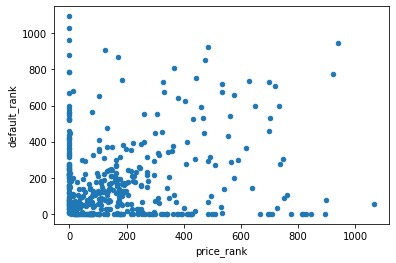

In [33]:
mongo_dataframe.plot(x ='price_rank', y="default_rank", kind = 'scatter')

In [34]:
df = pd.DataFrame.from_records(mycol.find({},{"record.room_type":1}))

md1 = []
keys= ['room_type_name', 'room_type_price', 'room_type_occupancy' , "room_type_breakfast", "room_type_cancellation"]
mongo_json = mycol.find({})
for x in mongo_json:
    md1.append(x["record"].get("room_type"))

md2 = []
mongo_data1 = {}
keys = ['room_type_breakfast', 'room_type_name' , "room_type_occupancy", "room_type_price", "room_type_cancellation"]
for key in keys:
    for item in md1:
        for dic in item:
            md2.append(dic.get(key))
    mongo_data1.update({key:md2})
    md2 = []

mongo_data1
mongo_dataframe = pd.DataFrame(mongo_data1)
mongo_dataframe

,room_type_breakfast,room_type_name,room_type_occupancy,room_type_price,room_type_cancellation
0,breakfast,Small Double Room,2,1304,free_cancellation
1,breakfast,Small Double Room,1,1077,free_cancellation
2,Room Only,Classic Triple Room,2,1379,free_cancellation
3,Room Only,Classic Triple Room,3,1663,free_cancellation
4,Room Only,Classic Triple Room,1,1077,free_cancellation
...,...,...,...,...,...
1907,Room Only,King Deluxe Room with Terrace,3,N/A,Non-refundable
1908,Room Only,Executive King Room With Free WiFi Access,3,N/A,Non-refundable
1909,Room Only,Classic Triple Room,3,3551.65,free_cancellation
1910,Room Only,Classic Triple Room,2,3024.18,free_cancellation


In [20]:
mongo_dataframe.plot(by="room_type_price", kind = 'hist')

NameError: name 'mongo_dataframe' is not defined

### 3.2 <b id="Aufgabenbereich2">Aufgabenbereich 2</b>
Basics für die Datenbereinigung aus einem MongoCursor abfragen (wird noch ergänzt)

<div style="background-color: #168b33; padding: 5px;"></div>

## 4 <b id="Pipeline">Aggregation Pipeline</b>

In [ ]:
pipeline = [
    {"$group": {"_id": "$record.ota", "count": {"$sum": 1}}},
     {"$sort": SON([("count", -1), ("_id", -1)])}
]

pprint(list(mycol.aggregate(pipeline)))

### 4.1 <b id="Aufgabenbereich3">Aufgabenbereich 3</b>

<div style="background-color: #168b33; padding: 5px;"></div>

## 5 <b id="Map">Map-Reduce</b>

In [ ]:
pipeline = [
    {"$group": {"_id": "$record.ota", "count": {"$sum": 1}}},
     {"$sort": SON([("count", -1), ("_id", -1)])}
]

pprint(list(mycol.aggregate(pipeline)))

### 5.1 <b id="Aufgabenbereich4">Aufgabenbereich 4</b>

<div style="background-color: #168b33; padding: 5px;"></div>

## 4 <b id="Pipeline">Aggregation Pipeline</b>

In [35]:
pipeline = [
    {"$group": {"_id": "$record.ota", "count": {"$sum": 1}}},
     {"$sort": SON([("count", -1), ("_id", -1)])}
]

pprint(list(mycol.aggregate(pipeline)))

[{'_id': 'booking.com', 'count': 410}]


### 4.1 <b id="Aufgabenbereich3">Aufgabenbereich 3</b>

<div style="background-color: #168b33; padding: 5px;"></div>

## 5 <b id="Map">Map-Reduce</b>

In [ ]:
pipeline = [
    {"$group": {"_id": "$record.ota", "count": {"$sum": 1}}},
     {"$sort": SON([("count", -1), ("_id", -1)])}
]

pprint(list(mycol.aggregate(pipeline)))

### 5.1 <b id="Aufgabenbereich4">Aufgabenbereich 4</b>